In [1]:
import pyvista as pv
import gudhi
import numpy as np
import matplotlib.pyplot as plt
import velour


from gtda.homology import WeakAlphaPersistence, VietorisRipsPersistence
from gtda.diagrams import Scaler, Filtering, PersistenceEntropy, BettiCurve, PairwiseDistance
from gtda.graphs import KNeighborsGraph, GraphGeodesicDistance



from sklearn.metrics import pairwise_distances

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot


# gtda plotting functions
from gtda.plotting import plot_heatmap

from gtda.pipeline import Pipeline

In [2]:
# import data

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
np.shape(X)

(150, 4)

In [4]:
np.shape(y)

(150,)

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
plant_0 = X[0:50]
plant_1 = X[50:100]
plant_2 = X[100:150]

In [109]:
from sklearn.model_selection import train_test_split

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(plant_0, y[y==0], test_size=0.5, random_state=42)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(plant_1, y[y==1], test_size=0.5, random_state=42)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(plant_2, y[y==2], test_size=0.5, random_state=42)

In [110]:
X_train_0

array([[5.1, 3.5, 1.4, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.7, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5. , 3.2, 1.2, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5. , 3.5, 1.3, 0.3],
       [5.4, 3.7, 1.5, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3.3, 1.4, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.4, 3. , 1.3, 0.2]])

In [111]:
y_train_0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [112]:
from gtda.plotting import plot_point_cloud

# TDA magic
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)


In [113]:
plot_point_cloud(X_train_0)

In [114]:
plot_point_cloud(X_test_0)

In [115]:
plot_point_cloud(X_train_1)

In [116]:
plot_point_cloud(X_train_2)

In [117]:

# ML tools
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from gtda.mapper.filter import Projection, Eccentricity, Entropy
from gtda.mapper.cover import CubicalCover
# scikit-learn method
from sklearn.cluster import DBSCAN
# giotto-tda method
from gtda.mapper.cluster import FirstSimpleGap

# Define filter function – can be any scikit-learn transformer
filter_func = Eccentricity()
# Define cover
cover = CubicalCover(n_intervals=10, overlap_frac=0.3)
# Choose clustering algorithm – default is DBSCAN
clusterer = DBSCAN()

# Configure parallelism of clustering step
n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)




In [151]:
fig = plot_static_mapper_graph(pipe, X_train_0, layout_dim=3)
fig.show(config={'scrollZoom': True})






In [119]:
Entropy1 = []
Entropy1

[]

In [120]:
plot_point_cloud(plant_0)

In [121]:
from gtda.homology import VietorisRipsPersistence


P = X_train_0



VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Connected components, holes, void
#WA = WeakAlphaPersistence(homology_dimensions=(0, 1, 2))
P_reshaped= P.reshape(1, *P.shape)
diagrams = VR.fit_transform(P_reshaped)
diagrams.shape

from gtda.plotting import plot_diagram



from gtda.diagrams import PersistenceEntropy


'Rescaling diagrams'

window_number =  0

diagramScaler = Scaler()

X_scaled = diagramScaler.fit_transform(diagrams)

print("scaled diagram")
plot = diagramScaler.plot(X_scaled, sample=window_number)

plot.show()





'Betti curve'



BC = BettiCurve()

X_betti_curves = BC.fit_transform(X_scaled)

fig = BC.plot(X_betti_curves, sample=window_number)
fig.show()



PE = PersistenceEntropy()

X_persistence_entropy = PE.fit_transform(X_scaled)

print("n_point_clouds, n_homology_dims",X_persistence_entropy)



Entropy1.append(X_persistence_entropy[0].tolist())



scaled diagram


n_point_clouds, n_homology_dims [[ 4.49989529  1.46268463 -1.        ]]


In [122]:
from gtda.homology import VietorisRipsPersistence


P =  P = X_train_1

VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Connected components, holes, void
#WA = WeakAlphaPersistence(homology_dimensions=(0, 1, 2))
P_reshaped= P.reshape(1, *P.shape)
diagrams = VR.fit_transform(P_reshaped)
diagrams.shape

from gtda.plotting import plot_diagram



from gtda.diagrams import PersistenceEntropy


'Rescaling diagrams'

window_number =  0

diagramScaler = Scaler()

X_scaled = diagramScaler.fit_transform(diagrams)

print("scaled diagram")
plot = diagramScaler.plot(X_scaled, sample=window_number)

plot.show()





'Betti curve'



BC = BettiCurve()

X_betti_curves = BC.fit_transform(X_scaled)

fig = BC.plot(X_betti_curves, sample=window_number)
fig.show()



PE = PersistenceEntropy()

X_persistence_entropy = PE.fit_transform(X_scaled)

print("n_point_clouds, n_homology_dims",X_persistence_entropy)


Entropy1.append(X_persistence_entropy[0].tolist())





scaled diagram


n_point_clouds, n_homology_dims [[4.49580007 1.61363104 0.        ]]


In [123]:
from gtda.homology import VietorisRipsPersistence


P = P = X_train_2

VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Connected components, holes, void
#WA = WeakAlphaPersistence(homology_dimensions=(0, 1, 2))
P_reshaped= P.reshape(1, *P.shape)
diagrams = VR.fit_transform(P_reshaped)
diagrams.shape

from gtda.plotting import plot_diagram



from gtda.diagrams import PersistenceEntropy


'Rescaling diagrams'

window_number =  0

diagramScaler = Scaler()

X_scaled = diagramScaler.fit_transform(diagrams)

print("scaled diagram")
plot = diagramScaler.plot(X_scaled, sample=window_number)

plot.show()





'Betti curve'



BC = BettiCurve()

X_betti_curves = BC.fit_transform(X_scaled)

fig = BC.plot(X_betti_curves, sample=window_number)
fig.show()



PE = PersistenceEntropy()

X_persistence_entropy = PE.fit_transform(X_scaled)

print("n_point_clouds, n_homology_dims",X_persistence_entropy)

Entropy1.append(X_persistence_entropy[0].tolist())

scaled diagram


n_point_clouds, n_homology_dims [[ 4.45717897  0.88095138 -1.        ]]


In [124]:
Entropy1 = np.array(Entropy1)

In [125]:
Entropy1

array([[ 4.49989529,  1.46268463, -1.        ],
       [ 4.49580007,  1.61363104,  0.        ],
       [ 4.45717897,  0.88095138, -1.        ]])

In [126]:
Entropy1_0 = Entropy1[:,0]
Entropy1_1 = Entropy1[:,1]
Entropy1_2 = Entropy1[:,2]

In [127]:
Plants = ['Setosa','Versicolor','Virginica']

In [128]:
import pandas as pd

df = pd.DataFrame({'Entropy_0': Entropy1_0, 'Entropy_1':Entropy1_1, 'Entropy_2':Entropy1_2, 'Plants':Plants})

In [129]:
df

,Entropy_0,Entropy_1,Entropy_2,Plants
0,4.499895,1.462685,-1.0,Setosa
1,4.495800,1.613631,0.0,Versicolor
2,4.457179,0.880951,-1.0,Virginica


In [130]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_3d(df, x='Entropy_0', y='Entropy_1', z='Entropy_2',
              color='Plants')
fig.show()

In [131]:
Entropy2 = []
Entropy2

[]

In [132]:
from gtda.homology import VietorisRipsPersistence


P = X_test_0



VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Connected components, holes, void
#WA = WeakAlphaPersistence(homology_dimensions=(0, 1, 2))
P_reshaped= P.reshape(1, *P.shape)
diagrams = VR.fit_transform(P_reshaped)
diagrams.shape

from gtda.plotting import plot_diagram



from gtda.diagrams import PersistenceEntropy


'Rescaling diagrams'

window_number =  0

diagramScaler = Scaler()

X_scaled = diagramScaler.fit_transform(diagrams)

print("scaled diagram")
plot = diagramScaler.plot(X_scaled, sample=window_number)

plot.show()





'Betti curve'



BC = BettiCurve()

X_betti_curves = BC.fit_transform(X_scaled)

fig = BC.plot(X_betti_curves, sample=window_number)
fig.show()



PE = PersistenceEntropy()

X_persistence_entropy = PE.fit_transform(X_scaled)

print("n_point_clouds, n_homology_dims",X_persistence_entropy)



Entropy2.append(X_persistence_entropy[0].tolist())



scaled diagram


n_point_clouds, n_homology_dims [[ 4.41952873  0.         -1.        ]]


In [133]:
from gtda.homology import VietorisRipsPersistence


P =  P = X_test_1

VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Connected components, holes, void
#WA = WeakAlphaPersistence(homology_dimensions=(0, 1, 2))
P_reshaped= P.reshape(1, *P.shape)
diagrams = VR.fit_transform(P_reshaped)
diagrams.shape

from gtda.plotting import plot_diagram



from gtda.diagrams import PersistenceEntropy


'Rescaling diagrams'

window_number =  0

diagramScaler = Scaler()

X_scaled = diagramScaler.fit_transform(diagrams)

print("scaled diagram")
plot = diagramScaler.plot(X_scaled, sample=window_number)

plot.show()





'Betti curve'



BC = BettiCurve()

X_betti_curves = BC.fit_transform(X_scaled)

fig = BC.plot(X_betti_curves, sample=window_number)
fig.show()



PE = PersistenceEntropy()

X_persistence_entropy = PE.fit_transform(X_scaled)

print("n_point_clouds, n_homology_dims",X_persistence_entropy)


Entropy2.append(X_persistence_entropy[0].tolist())





scaled diagram


n_point_clouds, n_homology_dims [[ 4.41324307  1.22272095 -1.        ]]


In [134]:
from gtda.homology import VietorisRipsPersistence


P = P = X_test_2

VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Connected components, holes, void
#WA = WeakAlphaPersistence(homology_dimensions=(0, 1, 2))
P_reshaped= P.reshape(1, *P.shape)
diagrams = VR.fit_transform(P_reshaped)
diagrams.shape

from gtda.plotting import plot_diagram



from gtda.diagrams import PersistenceEntropy


'Rescaling diagrams'

window_number =  0

diagramScaler = Scaler()

X_scaled = diagramScaler.fit_transform(diagrams)

print("scaled diagram")
plot = diagramScaler.plot(X_scaled, sample=window_number)

plot.show()





'Betti curve'



BC = BettiCurve()

X_betti_curves = BC.fit_transform(X_scaled)

fig = BC.plot(X_betti_curves, sample=window_number)
fig.show()



PE = PersistenceEntropy()

X_persistence_entropy = PE.fit_transform(X_scaled)

print("n_point_clouds, n_homology_dims",X_persistence_entropy)

Entropy2.append(X_persistence_entropy[0].tolist())

scaled diagram


n_point_clouds, n_homology_dims [[ 4.44060295  1.78463566 -1.        ]]


In [135]:
Entropy2 = np.array(Entropy2)

In [136]:
Entropy2_0 = Entropy2[:,0]
Entropy2_1 = Entropy2[:,1]
Entropy2_2 = Entropy2[:,2]

In [137]:
Plants = ['Setosa2','Versicolor2','Virginica2']

In [138]:
import pandas as pd

df2 = pd.DataFrame({'Entropy_0': Entropy2_0, 'Entropy_1':Entropy2_1, 'Entropy_2':Entropy2_2, 'Plants':Plants})

In [139]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_3d(df2, x='Entropy_0', y='Entropy_1', z='Entropy_2',
              color='Plants')
fig.show()

In [140]:
Entropy_tot = pd.concat([df, df2])
display(Entropy_tot)

,Entropy_0,Entropy_1,Entropy_2,Plants
0,4.499895,1.462685,-1.0,Setosa
1,4.495800,1.613631,0.0,Versicolor
2,4.457179,0.880951,-1.0,Virginica
0,4.419529,0.000000,-1.0,Setosa2
1,4.413243,1.222721,-1.0,Versicolor2
2,4.440603,1.784636,-1.0,Virginica2


In [141]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_3d(Entropy_tot, x='Entropy_0', y='Entropy_1', z='Entropy_2',
              color='Plants')
fig.show()

In [98]:
E1 = Entropy1

In [100]:
Entropy = Entropy2

In [1]:
E1

NameError: name 'E1' is not defined

In [70]:
E1 - Entropy

array([[ 0.08036656,  1.46268463,  0.        ],
       [ 0.082557  ,  0.39091009,  1.        ],
       [ 0.01657602, -0.90368428,  0.        ]])

In [102]:
from numpy import linalg as LA

In [103]:
Pairwise_0 = []
Pairwise_1 = []
Pairwise_2 = []
for i in range(len(E1)) :
    #print(i)
    if i == 0:
        print(i,'-',i,':', E1[i]-Entropy[i])
        #Pairwise_0.append(E1[i]-Entropy[i])
        Pairwise_0.append(LA.norm(E1[i]-Entropy[i]))
        print(i,'-',i+1,':', E1[i]-Entropy[i+1])
        #Pairwise_0.append(E1[i]-Entropy[i+1])
        Pairwise_0.append(LA.norm(E1[i]-Entropy[i+1]))
        print(i,'-',i+2,':', E1[i]-Entropy[i+2])
        #Pairwise_0.append(E1[i]-Entropy[i+2])
        Pairwise_0.append(LA.norm(E1[i]-Entropy[i+2]))
    elif i == 1 :
        print(i,'-',i-1,':', E1[i]-Entropy[i-1])
        #Pairwise_1.append(E1[i]-Entropy[i-1])
        Pairwise_1.append(LA.norm(E1[i]-Entropy[i-1]))
        print(i,'-',i,':', E1[i]-Entropy[i])
        #Pairwise_1.append(E1[i]-Entropy[i])
        Pairwise_1.append(LA.norm(E1[i]-Entropy[i]))
        print(i,'-',i+1,':', E1[i]-Entropy[i+1])
        #Pairwise_1.append(E1[i]-Entropy[i+1])
        Pairwise_1.append(LA.norm(E1[i]-Entropy[i+1]))
    elif i == 2 :
        print(i,'-',i-2,':', E1[i]-Entropy[i-2])
        #Pairwise_2.append(E1[i]-Entropy[i-2])
        Pairwise_2.append(LA.norm(E1[i]-Entropy[i-2]))
        print(i,'-',i-1,':', E1[i]-Entropy[i-1])
        #Pairwise_2.append(E1[i]-Entropy[i-1])
        Pairwise_2.append(LA.norm(E1[i]-Entropy[i-1]))
        print(i,'-',i,':', E1[i]-Entropy[i])
        #Pairwise_2.append(E1[i]-Entropy[i])
        Pairwise_2.append(LA.norm(E1[i]-Entropy[i]))
        

0 - 0 : [1.22446238 2.65258458 0.        ]
0 - 1 : [1.32679722 2.65258458 0.        ]
0 - 2 : [1.3044736  2.65258458 0.        ]
1 - 0 : [1.25339241 2.4644036  0.        ]
1 - 1 : [1.35572726 2.4644036  0.        ]
1 - 2 : [1.33340363 2.4644036  0.        ]
2 - 0 : [1.1895184  1.94052355 0.        ]
2 - 1 : [1.29185324 1.94052355 0.        ]
2 - 2 : [1.26952961 1.94052355 0.        ]


In [104]:
DF = [Pairwise_0, Pairwise_1, Pairwise_2]


In [105]:
DF = pd.DataFrame({'Setosa': DF[0], 'Vernicolor': DF[1], 'Virgina': DF[2], 'Plants':['Setosa','Vernicolor','Virgina']})

In [106]:
DF

,Setosa,Vernicolor,Virgina,Plants
0,2.921560,2.764829,2.276090,Setosa
1,2.965906,2.812700,2.331205,Vernicolor
2,2.955987,2.802008,2.318909,Virgina


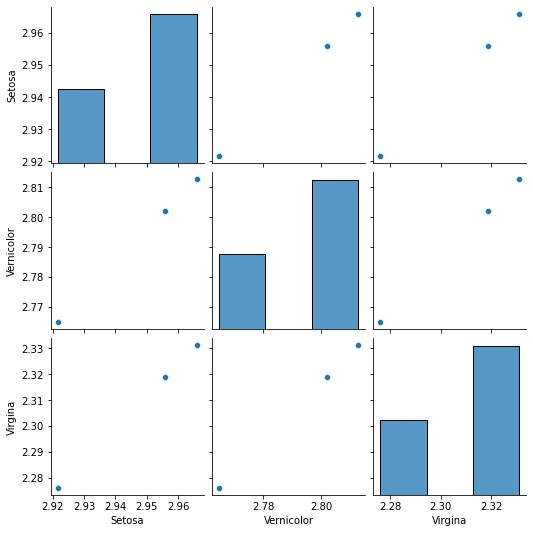

In [107]:
import seaborn as sns
sns.pairplot(DF)

In [108]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_3d(DF, x='Setosa', y='Vernicolor', z='Virgina',
              color='Plants')
fig.show()

In [ ]:




# Try different distances
#print("Trying different distances")
#Landscape L2 distance
#p_L = 2
#n_layers = 5
#PD = PairwiseDistance(metric='landscape',
#                      metric_params={'p': p_L, 'n_layers': n_layers, 'n_bins': 1000},
#                      order=None)

#X_distance_L = PD.fit_transform(X_scaled)
#X_distance_L.shape


#fig = plot_heatmap(X_distance_L[:, :, 0], colorscale='reds')
#fig.show()



# 2-Wasserstein distances

#p_W = 2
#PD = PairwiseDistance(metric='wasserstein',
#                      metric_params={'p': p_W, 'delta': 0.1},
#                      order=None)

#X_distance_W = PD.fit_transform(X_scaled)

#fig = plot_heatmap(X_distance_W[:, :, 0], colorscale='greens')
#fig.show()

# Geodesic distance

#n_neighbors = 2
#kNN = KNeighborsGraph(n_neighbors=n_neighbors)

#X_kNN = kNN.fit_transform(X_scaled)

#GGD = GraphGeodesicDistance()

#GGD.fit_transform_plot(X_kNN, sample=window_number);

#fig = plot_heatmap(pairwise_distances(X_scaled[window_number]), colorscale='blues')
#fig.show()




#Try persistent diagram with new distance
# Steps of the Pipeline
#steps = [
#    ('kNN_graph', kNN),
#    ('graph_geo_distance', GGD),
#    ('diagrams', VietorisRipsPersistence(metric='precomputed',
#                                         homology_dimensions=(0,1,2)))
#    ]

# Define the Pipeline
#pipeline = Pipeline(steps)

# Run the pipeline
#X_diagrams = pipeline.fit_transform(X_scaled)

#fig = pipeline[-1].plot(X_diagrams, sample=window_number)

#fig.show()

In [ ]:
from PIL import Image
import tifffile as TIF

# Import the tiff file with tifffile

img = TIF.imread('setosa.tiff')
#img = Image.open(options.input)

img = img[0]   
plt.imshow(img)

In [ ]:
np.shape(img)

In [ ]:
X = img.reshape(1, *img.shape)

In [ ]:
import skimage.filters as skfilt
#thresh_val = skfilt.try_all_threshold(img)
#mask = img > thresh_val
fig, ax = skfilt.try_all_threshold(img, figsize=(15, 12), verbose=False)

In [ ]:
import numpy as np
from gtda.plotting import plot_heatmap
from gtda.images import Binarizer

print('Binarization')
binarizer = Binarizer(threshold=0.48)
im_binarized = binarizer.fit_transform(1-X)
plot_heatmap(im_binarized[0])



In [ ]:
np.shape(im_binarized)

In [ ]:
from gtda.images import HeightFiltration

height_filtration = HeightFiltration()
im_filtration = height_filtration.fit_transform(im_binarized)

radial_filtration.plot(im_filtration, colorscale="jet")

In [ ]:
from gtda.homology import CubicalPersistence

cubical_persistence = CubicalPersistence(n_jobs=-1)
im_cubical = cubical_persistence.fit_transform(im_filtration)

cubical_persistence.plot(im_cubical)

In [ ]:
print(f"diagrams.shape: {im_cubical.shape} ({im_cubical.shape[1]} topological features)")

In [ ]:
from gtda.diagrams import Scaler

scaler = Scaler()
im_scaled = scaler.fit_transform(im_cubical)

scaler.plot(im_scaled)

In [ ]:
PE = PersistenceEntropy()

im_persistence_entropy = PE.fit_transform(im_scaled)

print("n_point_clouds, n_homology_dims",im_persistence_entropy)

In [ ]:
Entropy2 = []

In [ ]:
from sklearn.pipeline import make_pipeline, make_union
from gtda.diagrams import PersistenceEntropy
from gtda.images import HeightFiltration
from gtda.homology import CubicalPersistence

In [ ]:

height_pipeline = Pipeline([
    ('binarizer', Binarizer(threshold=0.45)),
    ('filtration', HeightFiltration()),
    ('diagram', CubicalPersistence()),
    ('feature', PersistenceEntropy(nan_fill_value=-1)),
    
])

In [ ]:
im_entropy = height_pipeline.fit_transform(im_binarized)
im_entropy
Entropy2.append(im_entropy[0].tolist())
Entropy2

In [3]:
Mesh[0]

NameError: name 'Mesh' is not defined